**실습4**
### **wine recognition 데이터를 이용한 <span style="color:darkgreen">AI 예측</span> 문제**
---

#### 와인의 성분 데이터를 이용하여 와인 종류를 예측하는 AI 문제입니다.
#### AI코딩 단계에 따라 주어지는 문제를 읽고 답안을 작성하세요.
#### (wine recognition 데이터 : sklearn 내장 연습용 데이터셋 사용)
 - 데이터 : 분류(카테고리)
 - 모델 : RandomForest(머신러닝 성능 비교 분석), DeepLearning
 - 주요 전처리 : 분석 Column 추가, 정규화(normalization), label 전처리(카테고리 → 수치화)
 - 주요 학습 내용 : 산점도, 분류 모델 생성(분류방법, input, output 처리, 손실함수 등), 머신러닝 모델 비교학습(리스트 활용)
---

**wine recognition 데이터 컬럼 설명 (sklearn 내장 연습용 데이터셋)**
- Alcohol : 알콜도수
- Malic Acid : 사과산
- Ash : 회분
- Alcalinity of Ash : 회분의 알칼리도
- Magnesium : 마그네슘
- Total phenols : 총 폴리페놀
- Flavanoids : 플로보노이드 폴페놀
- Nonflavanoid phenols : 비 플로보노이드 폴리페놀
- Proanthocyanins : 프로안토시아닌
- Color intensity : 색의 강도
- Hue : 색상
- OD280/OD315 of diluted wines : 희석와인의 OD280/OD315 비율
- Proline : 프롤린
- class : 라벨(y변수_ 데이터로 각각 다른 종류의 와인을 가르킴
    * 0, 1, 2 : 서로 다른 종류의 와인을 가리킴.


> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행하시오.**<br>
> **sklearn에서 제공하는 load_breast_cacncer에 대한 데이터를 불러올 예정입니다. <span style="color:darkgreen"></span>**<br>
> - 해당 형태로 불러온 데이터는 AIDU 환경변수와 상관없이 사용할수 있습니다.<br>
> - 분석할 feautre 데이터는 x 변수에, 라벨은 y변수에 저장 되게 됩니다.(사전 x,y 데이터 분리 실행)


---



In [1]:
from sklearn.datasets import load_wine
wine = load_wine()
x = wine.data # 인풋으로 사용할 데이터
y = wine.target # 아웃풋, target으로 사용할 데이터
col_names = wine.feature_names # 인풋으로 사용할 데이터의 컬럼별 이름들

### **Q1. Numpy를 np로 alias하여 사용할 수 있도록 불러오는 코드를 작성하고 실행하시기 바랍니다.**
---

In [2]:
import numpy as np

### **Q2.Matplotlib의 pyplot을 plt로 alias하여 사용할 수 있도록 불러오는 코드를 작성하고 실행하시기 바랍니다.**
---

In [3]:
import matplotlib.pyplot as plt

### **Q3. 인풋으로 사용할 데이터( x )의 row 수와 column 수를 확인하시기 바랍니다.**
---

In [4]:
print(x.shape)

(178, 13)


In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### **Q4. 데이터를 트레이닝셋 / Valid셋으로 분할하시기 바랍니다.**
* **
- x, y를 이용한다.
- train : test = 8 : 2
- y의 클래스가 골고루 분할되도록 stratify하게 분할한다.
- 변수명 규칙은 다음과 같다.
    * x_train, y_train
    * x_valid, y_valid
- random state, seed 등은 2021로 설정한다.
---

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2021)

### **Q5. Decision Tree 모델들을 학습시키시기 바랍니다.**
* **
- 트레이닝 셋 (x_train, y_train)을 이용하여 학습시킨다.
- 트리의 leaf에는 최소 10개 샘플이 있어야 한다.
- max_depth를 1 부터 15까지 늘려가며 총 15개의 트리를 학습시킨다.
- 학습시킨 트리들은 리스트를 만들어 trees 변수에 담아둔다.
- seed나 random_state는 2021로 고정한다.
---

In [7]:
from sklearn.tree import DecisionTreeClassifier

trees = []
for i in range(1, 16):
    clf = DecisionTreeClassifier(min_samples_leaf=10, max_depth=i, random_state=2021)
    clf.fit(x_train, y_train)
    trees.append(clf)

In [8]:
trees

[DecisionTreeClassifier(max_depth=1, min_samples_leaf=10, random_state=2021),
 DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=2021),
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=2021),
 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=2021),
 DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=2021),
 DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=2021),
 DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, random_state=2021),
 DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, random_state=2021),
 DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, random_state=2021),
 DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=2021),
 DecisionTreeClassifier(max_depth=11, min_samples_leaf=10, random_state=2021),
 DecisionTreeClassifier(max_depth=12, min_samples_leaf=10, random_state=2021),
 DecisionTreeClassifier(max_depth=13, min_samples_leaf=10, ra

### **Q6. Decision Tree 모델들의 성능을 리스트에 담아 accs에 선언하시기 바랍니다.**
* **
- max_depth가 1인 트리부터 순서대로 평가하여 리스트에 담는다.
- 성능 평가는 5번에서 분리한 벨리데이션 셋을 이용한다.
- 성능지표로는 accuracy를 사용한다.
---

In [9]:
accs = []
for i in range(len(trees)):
    acc = trees[i].score(x_valid, y_valid)
    accs.append(acc)

In [10]:
accs

[0.6388888888888888,
 0.9166666666666666,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444]

### **Q7. Decision Tree의 max depth에 따른 accuracy를 시각화 하고, 가장 성능이 좋은 depth를 선택하시기 바랍니다.**
* **
- 위의 Q7에서 제작한 리스트 accs를 이용한다.
- line plot 이나 scatter plot을 이용한다.
- 동일 성능의 depth가 여러개라면, 가장 작은 depth를 선택한다.
---

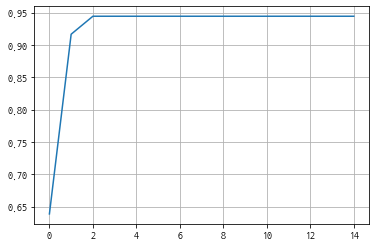

In [11]:
plt.plot(accs)
plt.grid(True)
plt.show()

### **Q8. Decision Tree 선택된 depth에서 모델들을 학습시키시기 바랍니다.**
* **
- 트레이닝 셋 (x_train, y_train)을 이용하여 학습시킨다.
- 트리의 leaf에 담길 최소 샘플 수를 5개에서 15개까지 늘려가며 트리를 학습시킨다.(min_samples_leaf 변수를 변화시키면서 학습한다.)
- max_depth는 선택한 depth로 고정한다.
- 학습시킨 트리들은 리스트를 만들어 trees 변수에 담아둔다.
- seed나 random_state는 2021로 고정한다.
---

In [12]:
trees = []
for i in range(5, 16):
    clf = DecisionTreeClassifier(min_samples_leaf=i, max_depth=3, random_state=2021)
    clf.fit(x_train, y_train)
    trees.append(clf)

In [13]:
trees

[DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=2021),
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, random_state=2021),
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=7, random_state=2021),
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, random_state=2021),
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=9, random_state=2021),
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=2021),
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=11, random_state=2021),
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=12, random_state=2021),
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=13, random_state=2021),
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=14, random_state=2021),
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=15, random_state=2021)]

### **Q9. Q8에서 학습시킨 Decision Tree 모델들의 성능을 리스트에 담아 accs에 선언하시기 바랍니다.**
* **
- leaf에 담길 최소 샘플수가 1인 트리 부터 순서대로 평가하여 리스트에 담는다.
- 벨리데이션 셋 위에서 성능을 평가한다.
- 성능지표로는 accuracy를 사용한다.
---

In [14]:
accs = []
for i in range(len(trees)):
    acc = trees[i].score(x_valid, y_valid)
    accs.append(acc)

In [15]:
accs

[0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.9444444444444444,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.9166666666666666,
 0.8611111111111112]

### **Q10. Decision Tree의 leaf에 담길 최소 샘플수에 따른 accuracy를 시각화 하고, 가장 성능이 좋은 최소 샘플수를 선택하시기 바랍니다.**
* **
- 위의 Q10에서 제작한 리스트 accs를 이용한다.
- line plot을 이용해서 시각화 한다.
- 동일 성능의 최소 샘플수가 여러개라면, 가장 최소값을 선택한다.
---

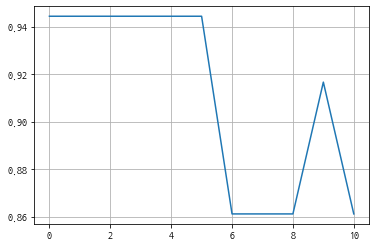

In [16]:
plt.plot(accs)
plt.grid(True)
plt.show()

### **Q11. Q10번에서 시각화한 트리의 relative feature importance를 시각화 하시기 바랍니다.**
* **
- 수평 bar plot을 이용한다.
- 각 변수의 이름은 col_names를 활용한다.
---

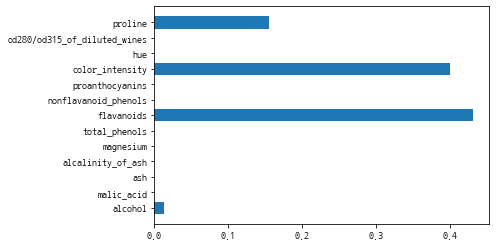

In [17]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=2021)
clf.fit(x_train, y_train)

rfi = clf.feature_importances_

plt.barh(col_names, rfi, align='center')
plt.show()

### **Q12. Q11번에서 시각화한 트리의 accuracy를 출력하시기 바랍니다.**
* **
- 테스트셋을 이용한다.
---

In [18]:
print(clf.score(x_valid, y_valid))

0.9444444444444444


> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행하시기 바랍니다.**
>

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping

### **Q13. 아래 조건에 맞추어 뉴럴네트워크 모델을 학습시키시기 바랍니다.**
* **
- Tensorflow framework를 사용한다.
- 히든레이어는 아래와 같은 규칙에 맞추어 구성합니다.
    * 2개 이상의 fully connected layer를 사용할 것
    * Drop out 테크닉을 적절히 활용한다.
- Early stopping을 이용하여, validation loss가 10번 이상 개선되지 않으면 학습을 중단 시키고, 가장 성능이 좋았을 때의 가중치를 복구한다.
- 학습과정의 로그(loss, accuracy)를 history에 선언하여 남긴다.
- y를 별도로 원핫인코딩 하지 않고 분류모델을 학습시킬 수 있도록 한다.(loss function을 sparse_categorical_crossentropy 로 사용한다)
- epochs는 2000번을 지정한다.
---

In [20]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(13,)))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=2000, callbacks=[es], validation_data=(x_valid, y_valid), verbose=1)

Epoch 1/2000
5/5 [==============================] - 0s 39ms/step - loss: 50.5574 - accuracy: 0.4085 - val_loss: 9.4644 - val_accuracy: 0.3333
Epoch 2/2000
5/5 [==============================] - 0s 7ms/step - loss: 37.4635 - accuracy: 0.2887 - val_loss: 16.5237 - val_accuracy: 0.3333
Epoch 3/2000
5/5 [==============================] - 0s 15ms/step - loss: 31.6665 - accuracy: 0.3521 - val_loss: 11.1815 - val_accuracy: 0.3333
Epoch 4/2000
5/5 [==============================] - 0s 15ms/step - loss: 21.9739 - accuracy: 0.3732 - val_loss: 5.7936 - val_accuracy: 0.3333
Epoch 5/2000
5/5 [==============================] - 0s 8ms/step - loss: 25.6271 - accuracy: 0.3028 - val_loss: 6.3144 - val_accuracy: 0.3333
Epoch 6/2000
5/5 [==============================] - 0s 8ms/step - loss: 19.1030 - accuracy: 0.2606 - val_loss: 5.7716 - val_accuracy: 0.3333
Epoch 7/2000
5/5 [==============================] - 0s 16ms/step - loss: 17.4994 - accuracy: 0.3873 - val_loss: 5.5573 - val_accuracy: 0.3333
Epoch 8

### **Q14. 다음 조건에 맞추어 뉴럴네트워크의 학습 로그를 시각화 하시기 바랍니다.**
* **
- 필요한 라이브러리가 있다면 따로 불러온다.
- epochs에 따른 loss의 변화를 시각화 한다.
- train loss와 validation loss를 전부 시각화하고, 구별가능해야 한다.
- 그래프의 타이틀은 'Loss'로 표시한다.
- x축에는 'epochs'라고 표시하고 y축에는 'Loss'라고 표시한다.
- 위에서 학습한 머신러닝 모델과 성능을 비교해보시오. 
---

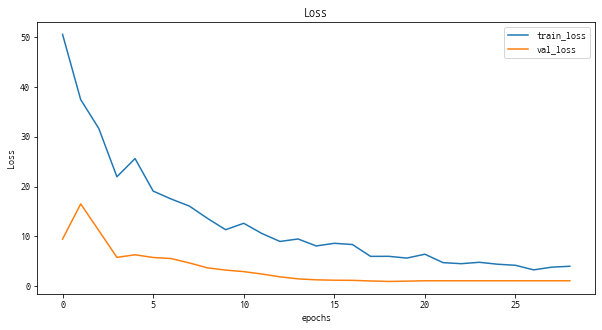

In [21]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss', 'val_loss'], loc='upper right')
plt.show()